In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [2]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory("C:/Users/HP/Desktop/CNN/train3/", 
                                          target_size=(150,150), 
                                          class_mode = 'binary')
                                          
                                          
                                         
test_dataset = test.flow_from_directory("C:/Users/HP/Desktop/CNN/test3/",
                                          target_size=(150,150),
                                          class_mode = 'binary')

Found 866 images belonging to 2 classes.
Found 191 images belonging to 2 classes.


In [3]:
test_dataset.class_indices

{'human': 0, 'sign': 1}

In [4]:
test_dataset

In [5]:
model = keras.Sequential()

# Convolutional layer and maxpool layer 1
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 2
model.add(keras.layers.Conv2D(32,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

#Convolutional layer and maxpool layer 3
# model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
# model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 4
# model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
# model.add(keras.layers.MaxPool2D(2,2))

# This layer flattens the resulting image array to 1D array
model.add(keras.layers.Flatten())

# Hidden layer with 512 neurons and Rectified Linear Unit activation function 
#model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(64,activation='relu'))
# Output layer with single neuron which gives 0 for Cat or 1 for Dog 
#Here we use sigmoid activation function which makes our model output to lie between 0 and 1
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [6]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [7]:
#steps_per_epoch = train_imagesize/batch_size

# model.fit_generator(train_dataset,
#          steps_per_epoch = 25,
#          epochs = 4,
#          validation_data = test_dataset
    
#          )
model.fit(train_dataset,epochs = 4,batch_size=32,validation_data = test_dataset)

Epoch 1/4
 2/28 [=>............................] - ETA: 46s - loss: 3.3843 - accuracy: 0.5000

C:\Users\HP\anaconda3\lib\site-packages\PIL\Image.py:962: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


28/28 [==============================] - 46s 2s/step - loss: 0.7184 - accuracy: 0.7875 - val_loss: 0.2295 - val_accuracy: 0.9372
Epoch 2/4
28/28 [==============================] - 42s 2s/step - loss: 0.0397 - accuracy: 0.9919 - val_loss: 0.0185 - val_accuracy: 0.9948
Epoch 3/4
28/28 [==============================] - 43s 2s/step - loss: 0.0135 - accuracy: 0.9965 - val_loss: 0.0078 - val_accuracy: 0.9948
Epoch 4/4
28/28 [==============================] - 44s 2s/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0050 - val_accuracy: 0.9948


In [8]:
def predictImage(filename):
    img1 = image.load_img(filename,target_size=(150,150))
    
    plt.imshow(img1)
 
    Y = image.img_to_array(img1)
    
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val >0.5:
        
        plt.xlabel("SIGN",fontsize=30)
        
    
    else:
        
        plt.xlabel("Photograph",fontsize=30)

[[0.]]


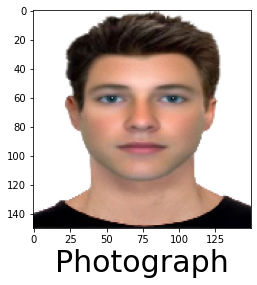

In [65]:
predictImage(r"C:\Users\HP\Desktop\CNN\test3\human\h (12).jpg")
#predictImage(r"C:\Users\HP\Desktop\CNN\test3\sign\s (72).png")
#predictImage(r"C:\Users\HP\Desktop\CNN\test\cat\4196.jpg")


model.save('predimg.h5')

In [10]:
model.save('predimg2.h5')

In [72]:
from keras.models import load_model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

In [73]:
model = load_model('predimg.h5')

Sign


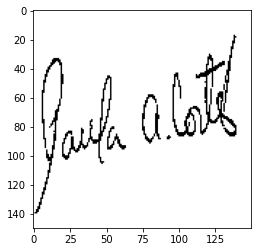

In [80]:
image = load_img(r"C:\Users\HP\Desktop\CNN\test3\sign\s (72).png", target_size=(150,150))
#image = load_img(r"C:\Users\HP\Desktop\CNN\test3\human\h (13).jpg", target_size=(150,150))
plt.imshow(image)
image = img_to_array(image)
image = np.expand_dims(image,axis=0)
val = model.predict(image)

if val>0.5:
    print('Sign')
    classification = 'Sign'
else:
    print('Photograph')
    classification = 'Photograph'